In [102]:
# importación de  librerias
#### Modulos para  procesar y analizar/viz datos 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.spatial.distance import cdist
from prettytable import PrettyTable
from src import  utils as fn

## modulos para  procesamiento avanzado de  datos y modelado IA/ML
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score, davies_bouldin_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer , SimpleImputer
from yellowbrick.cluster import KElbowVisualizer

# control de  advertencias
import  warnings
warnings.filterwarnings("ignore")

In [87]:
# cargue conjunto de datos 
df_nsclc = pd.read_csv('Data/data.csv')

In [88]:
df_nsclc .head(3)

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event,F.analysis
0,LUNG1-001,78.7515,2.0,3,0,IIIb,large cell,male,2165,1,1.771485
1,LUNG1-002,83.8001,2.0,0,0,I,squamous cell carcinoma,male,155,1,1.881307
2,LUNG1-003,68.1807,2.0,3,0,IIIb,large cell,male,256,1,1.376259


In [89]:
df_nsclc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         422 non-null    object 
 1   age               400 non-null    float64
 2   clinical.T.Stage  421 non-null    float64
 3   Clinical.N.Stage  422 non-null    int64  
 4   Clinical.M.Stage  422 non-null    int64  
 5   Overall.Stage     421 non-null    object 
 6   Histology         380 non-null    object 
 7   gender            422 non-null    object 
 8   Survival.time     422 non-null    int64  
 9   deadstatus.event  422 non-null    int64  
 10  F.analysis        422 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 36.4+ KB


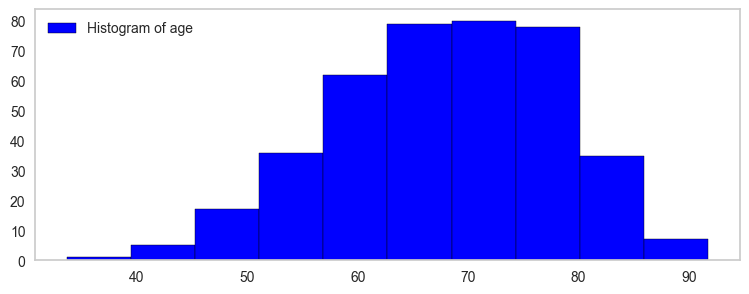

In [90]:
# Histograma de  la varaible "age" para identificar la distribuciónS
fn.plot_histogram_(df_nsclc, 'age', 'blue', bins=10, figsize=(20, 15))

In [91]:
## Proceso  de  imputación de  valores  perdidos  sobre utilizando KnnImputer
columnas=df_nsclc.columns # nombre de las columnas
knni = KNNImputer(n_neighbors=3)

col_imputations = knni.fit_transform(df_nsclc[['age']])
values_imputations = np.concatenate([df_nsclc[[ 'PatientID']],col_imputations,df_nsclc[[ 'clinical.T.Stage', 'Clinical.N.Stage',
       'Clinical.M.Stage', 'Overall.Stage', 'Histology', 'gender',
       'Survival.time', 'deadstatus.event', 'F.analysis']].values], axis=1)

Data2 = pd.DataFrame(values_imputations, columns=columnas)
Data2.head()

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event,F.analysis
0,LUNG1-001,78.7515,2.0,3,0,IIIb,large cell,male,2165,1,1.771485
1,LUNG1-002,83.8001,2.0,0,0,I,squamous cell carcinoma,male,155,1,1.881307
2,LUNG1-003,68.1807,2.0,3,0,IIIb,large cell,male,256,1,1.376259
3,LUNG1-004,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1,1.73471
4,LUNG1-005,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1,1.581113


In [92]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PatientID         422 non-null    object
 1   age               422 non-null    object
 2   clinical.T.Stage  421 non-null    object
 3   Clinical.N.Stage  422 non-null    object
 4   Clinical.M.Stage  422 non-null    object
 5   Overall.Stage     421 non-null    object
 6   Histology         380 non-null    object
 7   gender            422 non-null    object
 8   Survival.time     422 non-null    object
 9   deadstatus.event  422 non-null    object
 10  F.analysis        422 non-null    object
dtypes: object(11)
memory usage: 36.4+ KB


In [93]:
# Ajuste  de  tipo de  datos sobre  columnas  seleccionadas del dataFrame
cols_int = ['Clinical.N.Stage','Survival.time','Clinical.M.Stage', 'deadstatus.event' ]
cols_float = ['age', 'clinical.T.Stage','F.analysis',  ]

Data2 = fn.manejo_tipo_dato(Data2 ,cols_int , cols_float)

In [94]:
Data2.describe()

,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Survival.time,deadstatus.event,F.analysis
count,422.000000,421.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,68.036500,2.475059,1.355450,0.030806,988.857820,0.883886,1.469367
std,9.816499,1.130727,1.218116,0.294847,1035.567789,0.320742,0.322038
min,33.684900,1.000000,0.000000,0.000000,10.000000,0.000000,0.521329
25%,61.705175,2.000000,0.000000,0.000000,261.000000,1.000000,1.241398
50%,68.036500,2.000000,2.000000,0.000000,545.500000,1.000000,1.486758
75%,75.391250,4.000000,2.000000,0.000000,1397.000000,1.000000,1.693736
max,91.704300,5.000000,4.000000,3.000000,4454.000000,1.000000,2.602347


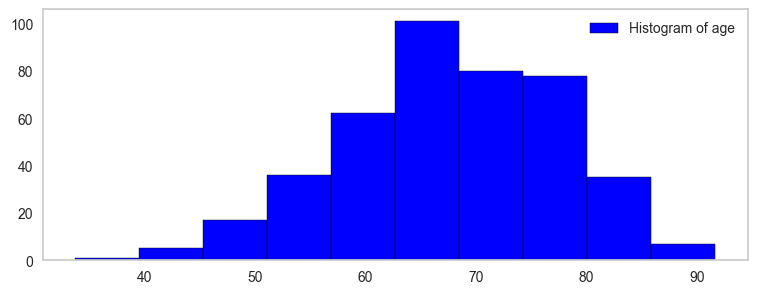

In [96]:
# Histograma de  la varaible "age" para identificar la distribución despues de  imputar  valores perdidos
fn.plot_histogram_(Data2, 'age', 'blue', bins=10, figsize=(20, 15))

## Tratamiento de datos nulos Histología

---

Al tratarse de datos categóricos se va a realizar una tabla de frecuencias cruzadas en base al clinical stage

In [97]:
pd.crosstab([Data2['Overall.Stage']], Data2['Histology'])

Histology,adenocarcinoma,large cell,nos,squamous cell carcinoma
Overall.Stage,,,,
I,11,15,17,23
II,8,5,2,23
IIIa,14,36,15,44
IIIb,18,57,29,62


In [98]:
Data3=Data2.copy()
Data3[["Histology"]]=Data3[["Histology"]].fillna('squamous cell carcinoma')
Data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         422 non-null    object 
 1   age               422 non-null    float64
 2   clinical.T.Stage  421 non-null    float64
 3   Clinical.N.Stage  422 non-null    int64  
 4   Clinical.M.Stage  422 non-null    int64  
 5   Overall.Stage     421 non-null    object 
 6   Histology         422 non-null    object 
 7   gender            422 non-null    object 
 8   Survival.time     422 non-null    int64  
 9   deadstatus.event  422 non-null    int64  
 10  F.analysis        422 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 36.4+ KB


## Tratamiento de datos faltantes DF

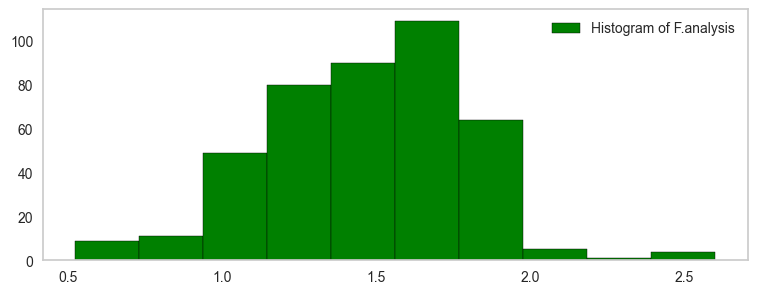

In [101]:
# Histograma de la varaiable  de interes F.analysis
fn.plot_histogram_(Data3, 'F.analysis','green', bins=10, figsize=(20, 15))

In [104]:
# Experimentación de  imputación por mediana
si = SimpleImputer(strategy='median')

col_imputations = si.fit_transform(Data3[['F.analysis']])
values_imputations = np.concatenate([Data3[[ 'PatientID', 'age','clinical.T.Stage', 'Clinical.N.Stage',
       'Clinical.M.Stage', 'Overall.Stage', 'Histology', 'gender',
       'Survival.time', 'deadstatus.event']].values, col_imputations], axis=1)

Data4 = pd.DataFrame(values_imputations, columns=columnas)
Data4.head()

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event,F.analysis
0,LUNG1-001,78.7515,2.0,3,0,IIIb,large cell,male,2165,1,1.771485
1,LUNG1-002,83.8001,2.0,0,0,I,squamous cell carcinoma,male,155,1,1.881307
2,LUNG1-003,68.1807,2.0,3,0,IIIb,large cell,male,256,1,1.376259
3,LUNG1-004,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1,1.73471
4,LUNG1-005,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1,1.581113


In [105]:

Data4 = fn.manejo_tipo_dato(Data4 ,cols_int , cols_float)
Data4.describe()

,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Survival.time,deadstatus.event,F.analysis
count,422.000000,421.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,68.036500,2.475059,1.355450,0.030806,988.857820,0.883886,1.469367
std,9.816499,1.130727,1.218116,0.294847,1035.567789,0.320742,0.322038
min,33.684900,1.000000,0.000000,0.000000,10.000000,0.000000,0.521329
25%,61.705175,2.000000,0.000000,0.000000,261.000000,1.000000,1.241398
50%,68.036500,2.000000,2.000000,0.000000,545.500000,1.000000,1.486758
75%,75.391250,4.000000,2.000000,0.000000,1397.000000,1.000000,1.693736
max,91.704300,5.000000,4.000000,3.000000,4454.000000,1.000000,2.602347


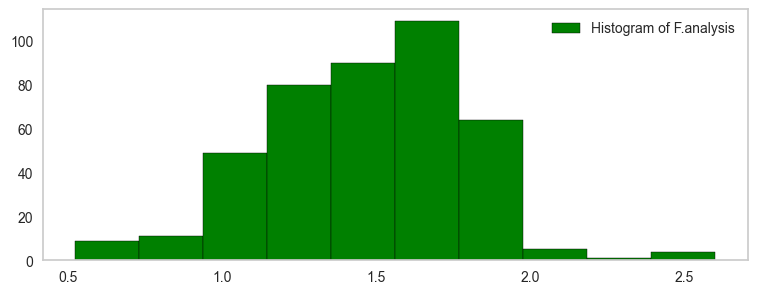

In [106]:
fn.plot_histogram_(Data4 , 'F.analysis','green', bins=10, figsize=(20, 15))

## Tratamiento de datos faltantes clinical.T.Stage y Overall.Stage

In [107]:
#Se almacena en Nulo si cada una de las filas de clinical.T.Stage contiene dato nulo o no

nulo=Data4[["clinical.T.Stage"]].isnull()

#Se almacena en una lista el indice de las filas que contienen datos nulos para clinical.T.Stage
filas_nulas=list()
for indice_fila,fila in nulo.iterrows():
    if nulo.at[indice_fila,'clinical.T.Stage']==True:
      filas_nulas.append(indice_fila)
      print(indice_fila)
      print(Data4.at[indice_fila,'PatientID'])
      print("Overall.Stage: " + str(Data4.at[indice_fila,'Overall.Stage']))
      print("Clinical.N.Stage: "+ str(Data4.at[indice_fila,'Clinical.N.Stage']))
      print("Clinical.M.Stage: "+ str(Data4.at[indice_fila,'Clinical.M.Stage']))

84
LUNG1-085
Overall.Stage: IIIb
Clinical.N.Stage: 3
Clinical.M.Stage: 0


In [108]:
pd.crosstab([Data4['Clinical.N.Stage'],Data4['Clinical.M.Stage']], Data4['clinical.T.Stage'])

clinical.T.Stage                   1.0  2.0  3.0  4.0  5.0
Clinical.N.Stage Clinical.M.Stage                         
0                0                  50   52   17   51    0
1                0                   3   12    5    3    0
2                0                  21   55   21   39    2
                 1                   0    0    0    1    0
                 3                   1    0    0    1    0
3                0                  18   37    9   18    0
                 3                   0    0    1    1    0
4                0                   0    0    0    3    0

In [109]:
filas_nulas=list()
for indice_fila,fila in nulo.iterrows():
    if nulo.at[indice_fila,'clinical.T.Stage']==True:
      filas_nulas.append(indice_fila)
      print(str(Data4.at[indice_fila,'clinical.T.Stage']))
      Data4.at[indice_fila,'clinical.T.Stage']=2
      print(str(Data4.at[indice_fila,'clinical.T.Stage']))

nan
2.0


In [110]:
#Se almacena en Nulo si cada una de las filas de Overall.Stage contiene dato nulo o no

nulo=Data4[["Overall.Stage"]].isnull()

#Se almacena en una lista el indice de las filas que contienen datos nulos para Overall.Stage
filas_nulas=list()
for indice_fila,fila in nulo.iterrows():
    if nulo.at[indice_fila,'Overall.Stage']==True:
      filas_nulas.append(indice_fila)
      print(indice_fila)
      print(Data4.at[indice_fila,'PatientID'])
      print("clinical.T.Stage: " + str(Data4.at[indice_fila,'clinical.T.Stage']))
      print("Clinical.N.Stage: "+ str(Data4.at[indice_fila,'Clinical.N.Stage']))
      print("Clinical.M.Stage: "+ str(Data4.at[indice_fila,'Clinical.M.Stage']))

271
LUNG1-272
clinical.T.Stage: 5.0
Clinical.N.Stage: 2
Clinical.M.Stage: 0


In [111]:
#Se eliminan las filas del dataframe
Data_final_faltantes=Data4.drop([271], axis=0, inplace=False)
Data_final_faltantes.info()
# ## Exportar Dataframe a csv
# Data_final_faltantes.to_csv('NSCLC_DF_faltantes.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 421
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         421 non-null    object 
 1   age               421 non-null    float64
 2   clinical.T.Stage  421 non-null    float64
 3   Clinical.N.Stage  421 non-null    int64  
 4   Clinical.M.Stage  421 non-null    int64  
 5   Overall.Stage     421 non-null    object 
 6   Histology         421 non-null    object 
 7   gender            421 non-null    object 
 8   Survival.time     421 non-null    int64  
 9   deadstatus.event  421 non-null    int64  
 10  F.analysis        421 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 39.5+ KB


In [117]:
nscl = pd.read_csv('Data/df_con_imputaciones.csv')

In [118]:
nan_rows = nscl[nscl['Histology'].isna()]
nan_rows

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event,F.analysis


In [119]:
T_rows = nscl[nscl['clinical.T.Stage'] == 5]
T_rows

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event,F.analysis
55,LUNG1-056,68.0365,5.0,2,0,IIIa,squamous cell carcinoma,female,547,0,1.672505


In [121]:
N_rows = nscl[nscl['Clinical.N.Stage'] == 4]
N_rows

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event,F.analysis
166,LUNG1-167,74.9295,4.0,4,0,IIIb,squamous cell carcinoma,male,1357,1,0.872282
231,LUNG1-232,73.2868,4.0,4,0,IIIb,large cell,male,2521,1,1.588498
290,LUNG1-292,66.2149,4.0,4,0,IIIb,squamous cell carcinoma,male,232,1,1.671252


In [123]:
M_rows = nscl[nscl['Clinical.M.Stage'] == 3]
M_rows

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event,F.analysis
71,LUNG1-072,71.4743,4.0,3,3,IIIb,nos,male,377,1,1.542416
255,LUNG1-256,53.0842,4.0,2,3,IIIb,large cell,male,291,1,1.658656
268,LUNG1-269,73.0595,3.0,3,3,IIIa,large cell,male,193,1,1.382715
331,LUNG1-333,63.6988,1.0,2,3,IIIa,adenocarcinoma,male,2985,1,1.223261


## DISTRIBUCIÓN DE LA EDAD, survival.time y F.analysis

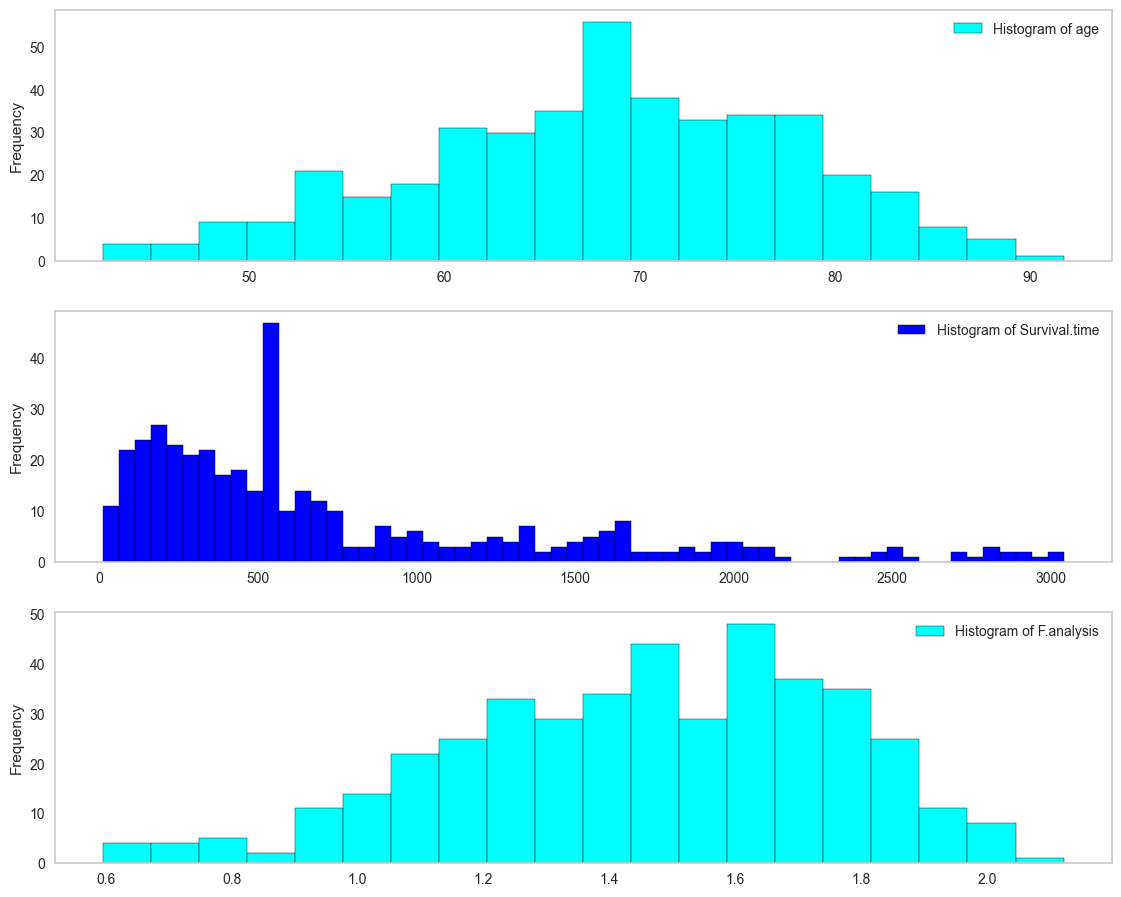

In [120]:
plt.figure(figsize=(30,15))

plt.subplot(421)
nscl['age'].plot.hist(bins=20, color='cyan', label='Histogram of age', edgecolor='black')
plt.legend(loc='best')
plt.grid(False)
plt.subplot(423)
nscl['Survival.time'].plot.hist(bins=60, color='blue', label='Histogram of Survival.time', edgecolor='black')
plt.legend(loc='best')
plt.grid(False)
plt.subplot(425)
nscl['F.analysis'].plot.hist(bins=20, color='cyan', label='Histogram of F.analysis', edgecolor='black')
plt.legend(loc='best')
plt.grid(False)